<a href="https://colab.research.google.com/github/HongSeongMo/Bigdata_Analysis_Professional/blob/main/241031.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
from scipy import stats

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/work/data.csv', encoding='euc-kr', index_col=0)
print(np.mean(df[df['성별'] == '남자'].쇼핑액))
print(np.mean(df[df['성별'] == '여자'].쇼핑액))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
177.14181818181822
169.5771428571429


In [ ]:
dfmale = df[df['성별'] == '남자']
dffemale = df[df['성별'] == '여자']

t, pvalue = stats.ttest_ind(dfmale['쇼핑액'], dffemale['쇼핑액'], equal_var=False, alternative='less')
print(t, pvalue)

0.9236189788977162 0.8202250865877998


In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
from scipy import stats

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/work/data.csv', encoding='euc-kr', index_col=0)
print(np.mean(df[df['성별'] == '남자'].쇼핑액))
print(np.mean(df[df['성별'] == '여자'].쇼핑액))

dfmale = df[df['성별'] == '남자']
dffemale = df[df['성별'] == '여자']

t, pvalue = stats.ttest_ind(dfmale['쇼핑액'], dffemale['쇼핑액'], equal_var=False, alternative='greater')
print(t, pvalue)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
177.14181818181822
169.5771428571429
0.9236189788977162 0.17977491341220025


In [4]:
dfmale = df[df['성별'] == '남자']
dffemale = df[df['성별'] == '여자']
noofmale = len(dfmale)
nooffemale = len(dffemale)
print(noofmale, nooffemale)
x1 = len(dfmale[dfmale['쿠폰선호도'] == '예'])
x2 = len(dffemale[dffemale['쿠폰선호도'] == '예'])
print(x1, x2)

55 35
22 26


In [5]:
observed = [[[x1, x2], [noofmale - x1, nooffemale - x2]]]
print(observed)

[[[22, 26], [33, 9]]]


In [9]:
chi, pvalue, dof, expect = stats.chi2_contingency(observed)
print(chi, pvalue, dof)
print(expect)

8.771451762523188 0.0030598180813934195 1
[[[29.33333333 18.66666667]
  [25.66666667 16.33333333]]]


In [10]:
alpha = 0.05
if pvalue < alpha:
  print('귀무가설 기각')
else:
  print('귀무가설 채택')

귀무가설 기각


In [2]:
import pandas as pd
import numpy as np
from scipy import stats
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/work/data.csv', encoding='euc-kr', index_col=0)
df1 = df[df['주거지역'] == '소도시'].쇼핑액
df2 = df[df['주거지역'] == '중도시'].쇼핑액
df3 = df[df['주거지역'] == '대도시'].쇼핑액
print(df1.describe())
print(df2.describe())
print(df3.describe())

count     30.000000
mean     167.680000
std       41.960297
min       80.400000
25%      147.300000
50%      169.200000
75%      195.000000
max      238.800000
Name: 쇼핑액, dtype: float64
count     24.000000
mean     178.500000
std       36.358648
min      111.600000
25%      158.700000
50%      172.800000
75%      205.800000
max      237.600000
Name: 쇼핑액, dtype: float64
count     36.000000
mean     176.766667
std       28.521250
min      112.800000
25%      159.300000
50%      176.400000
75%      195.600000
max      244.800000
Name: 쇼핑액, dtype: float64


In [3]:
group1 = df1.to_numpy()
group2 = df2.to_numpy()
group3 = df3.to_numpy()
n1 = len(group1)
n2 = len(group2)
n3 = len(group3)
print(n1, n2, n3)

30 24 36


In [4]:
avg1 = np.mean(group1)
avg2 = np.mean(group2)
avg3 = np.mean(group3)
print(avg1, avg2, avg3)

167.67999999999998 178.5 176.76666666666668


In [6]:
var1 = np.var(group1, ddof=1)
var2 = np.var(group2, ddof=1)
var3 = np.var(group3, ddof=1)
print(var1, var2, var3)

1760.666482758621 1321.9513043478262 813.4617142857143


In [7]:
Fstatistics, pvalue = stats.f_oneway(group1, group2, group3)
print(Fstatistics, pvalue)

0.7740556433121684 0.46428841020338874


In [8]:
alpha = 0.05
if pvalue < alpha:
  print('귀무가설 기각')
else:
  print('귀무가설 채택')

귀무가설 채택


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/work/data.csv', encoding='euc-kr', index_col=0)
df1 = df[df['주거지역'] == '소도시'].쇼핑액
df2 = df[df['주거지역'] == '중도시'].쇼핑액
df3 = df[df['주거지역'] == '대도시'].쇼핑액
group1 = df1.to_numpy()
group2 = df2.to_numpy()
group3 = df3.to_numpy()
Fstatistics, pvalue = stats.f_oneway(group1, group2, group3)
print(Fstatistics, pvalue)

0.7740556433121684 0.46428841020338874


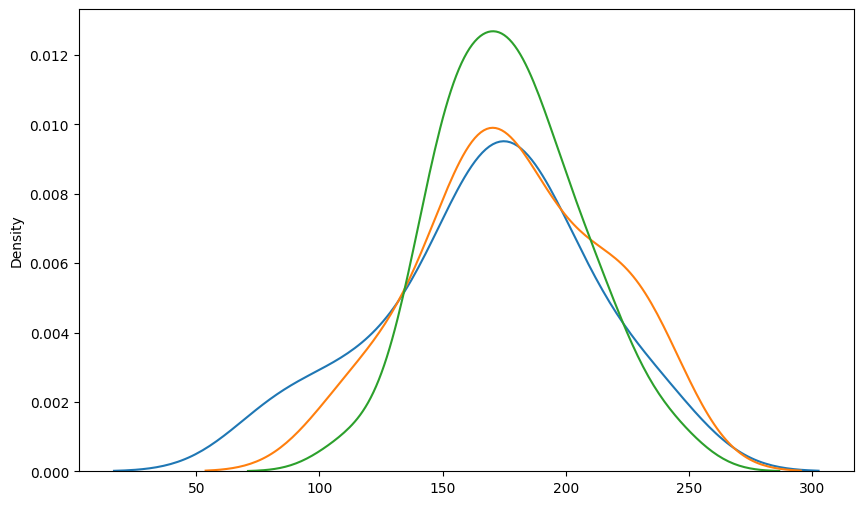

In [10]:
plt.rcParams['figure.figsize'] = [10, 6]
sns.kdeplot(group1)
sns.kdeplot(group2)
sns.kdeplot(group3)
plt.show()

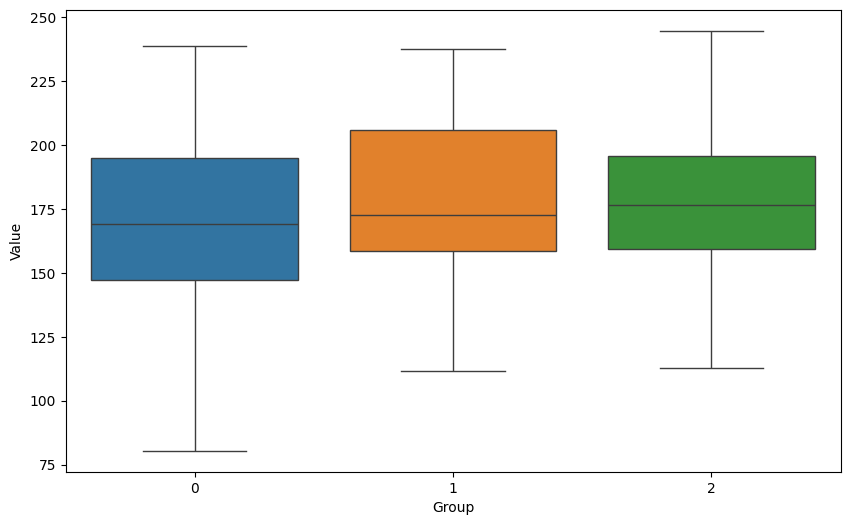

In [11]:
sns.boxplot(data=[group1, group2, group3])
plt.xlabel('Group')
plt.ylabel('Value')
plt.show()

In [28]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/work/data.csv', encoding='euc-kr', index_col=0)
dfnew = df[['쇼핑1월', '쇼핑2월', '쇼핑3월']]
print(dfnew['쇼핑1월'].describe())
print(dfnew['쇼핑2월'].describe())
print(dfnew['쇼핑3월'].describe())
print(dfnew.head())
print(dfnew['쇼핑1월'].shape)
print(dfnew['쇼핑2월'].shape)
print(dfnew['쇼핑3월'].shape)

count    90.000000
mean     64.973333
std      19.221528
min      15.600000
25%      52.800000
50%      64.800000
75%      80.100000
max      92.400000
Name: 쇼핑1월, dtype: float64
count    90.000000
mean     61.120000
std      17.848622
min      13.200000
25%      52.800000
50%      56.400000
75%      67.200000
max      92.400000
Name: 쇼핑2월, dtype: float64
count    90.000000
mean     48.106667
std      17.846668
min      13.200000
25%      38.700000
50%      52.800000
75%      52.800000
max      92.400000
Name: 쇼핑3월, dtype: float64
        쇼핑1월  쇼핑2월  쇼핑3월
고객번호                    
190105  76.8  64.8  54.0
190106  44.4  32.4  39.6
190107  66.0  66.0  51.6
190108  62.4  52.8  52.8
190109  63.6  54.0  51.6
(90,)
(90,)
(90,)


In [29]:
dfnew['month1'] = 1
dfnew['month2'] = 2
dfnew['month3'] = 3
d1 = dfnew[['쇼핑1월', 'month1']]
d1.rename(columns={'쇼핑1월':'value', 'month1':'month'}, inplace=True)
d2 = dfnew[['쇼핑2월', 'month2']]
d2.rename(columns={'쇼핑2월':'value', 'month2':'month'}, inplace=True)
d3 = dfnew[['쇼핑3월', 'month3']]
d3.rename(columns={'쇼핑3월':'value', 'month3':'month'}, inplace=True)
# dtotal = (d1.append(d2, ignore_index=True)).append(d3, ignore_index=True)
dtotal = pd.concat([d1, d2, d3], ignore_index=True)
print(dtotal.head())

   value  month
0   76.8      1
1   44.4      1
2   66.0      1
3   62.4      1
4   63.6      1


In [30]:
dtotal.shape

(270, 2)

In [20]:
model = ols('value ~ C(month)', data=dtotal).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

             sum_sq     df          F        PR(>F)
C(month)  14060.384    2.0  20.953457  3.525860e-09
Residual  89582.416  267.0        NaN           NaN


In [23]:
print(anova_table.loc['C(month)', 'F'])
print(anova_table.loc['C(month)', 'PR(>F)'])

20.953456580139303
3.5258602754912673e-09


In [25]:
alpha = 0.05
if anova_table.loc['C(month)', 'PR(>F)'] < alpha:
    print('귀무가설 기각')
else:
  print('귀무가설 채택')

귀무가설 기각
